### Import Libraries

In [1]:
import numpy as np
import pandas as pd

#import for visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

### Loading Dataset

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
print("datapoints =",train_data.shape[0])
print("features =",train_data.shape[1]-1) #(-1 to exclude the last column[target])

datapoints = 7352
features = 562


In [5]:
print("Missing values in datasets ? ",train_data.isnull().values.any())

Missing values in datasets ?  False


#### Target column [classes]

In [6]:
train_data["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

#### Classes Distribution

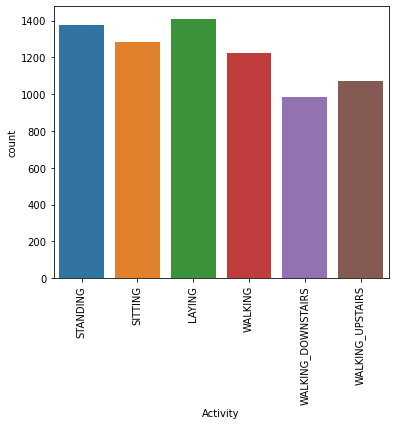

In [7]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x='Activity', data=train_data)
plt.xticks(x = train_data['Activity'],  rotation='vertical')
plt.show()

Ignore feature ( Subject ) because it is an identifier of the subject who carried out the experiment.
Ignore the target column (Activity)

In [8]:
X = pd.DataFrame(train_data.drop(['Activity','subject'],axis=1))

In [9]:
Y = train_data.Activity.values

In [10]:
print("X size is ,",X.shape, "Y size is , ", Y.shape)

X size is , (7352, 561) Y size is ,  (7352,)


Check the data type of the features

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [12]:
#Total Number of Continous  features in the training set
number_col = X._get_numeric_data().columns
print("Number of numeric features:",number_col.size)

Number of numeric features: 561


We will change the non-numeric target labels into numeric values

In [13]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()

In [14]:
encode.fit(Y)
y = encode.transform(Y)
y.shape

(7352,)

In [15]:
np.unique(Y)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [16]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

Scaling the features

In [17]:
# Scaling the feature 
##----StandardScaler: 
## the standerScaler used to scale the features to the unit variance. 
## Scalling needed before training to prevent one featuers (has magnitude lager than others) to dominate the other.
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
X = scaler_.fit_transform(X)

Splitting the data into training and validation sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2,random_state=99)
print("Training input size , ",X_train.shape,"Validation input size ,", X_valid.shape)
print("Training output size," ,y_train.shape,"Validation output size, ", y_valid.shape)

Training input size ,  (5881, 561) Validation input size , (1471, 561)
Training output size, (5881,) Validation output size,  (1471,)


#### Training the model by Linear SVM with deafult hyperparameters

In [19]:
from sklearn.svm import LinearSVC

In [20]:
#instantiate classifier
svm= LinearSVC( max_iter=30000)#svm= LinearSVC(loss='hinge')

In [21]:
# fit classifier to training set
svm.fit(X_train,y_train)

LinearSVC(max_iter=30000)

In [22]:
# make perdication on the validation set
y_pre = svm.predict(X_valid)

In [23]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_valid, y_pre)))

Model accuracy score with default hyperparameters: 0.9837


#### Test the model (supposed to be the last part ) 

In [24]:
#load the testing dataset
test_data = pd.read_csv('test.csv')
print("Missing values in datasets ? ",test_data.isnull().values.any())

Missing values in datasets ?  False


In [25]:
#Ignore feature ( Subject ) because it is an identifier of the subject who carried out the experiment.
#Ignore the target column (Activity)

X_test = pd.DataFrame(test_data.drop(['Activity','subject'],axis=1))

Y_test = test_data.Activity.values

print("X size is ,",X_test.shape, "Y size is , ", Y_test.shape)

X size is , (2947, 561) Y size is ,  (2947,)


In [26]:
#change the non-numeric target labels into numeric values
encode.fit(Y_test)
y_test = encode.transform(Y_test)

# Scaling the feature 
##----StandardScaler: 
## the standerScaler used to scale the features to the unit variance. 
## Scalling needed before training to prevent one featuers (has magnitude lager than others) to dominate the other.
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
X_testt = scaler_.fit_transform(X_test)

In [27]:
# make perdication on the validation set
y_pre = svm.predict(X_testt)
# compute and print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pre)))

Model accuracy score: 0.9549


In [30]:
# Create the parameter grid based on the results of random search 
params_grid = [{'C': [1.0, 10, 100]}]

In [31]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(LinearSVC(max_iter=200000), params_grid, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=200000),
             param_grid=[{'C': [1.0, 10, 100]}])

In [32]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_valid)
Y_pred_label = list(encode.inverse_transform(Y_pred))

Best score for training data: 0.9795958825331322 

Best C: 1.0 



In [33]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_valid,Y_pred))
print("\n")
print(classification_report(y_valid,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Validation set score for SVM: %f" % final_model.score(X_valid  , y_valid ))

# svm_model.score

[[248   1   0   0   0   0]
 [  1 270   6   0   0   0]
 [  0  12 281   0   0   0]
 [  0   0   0 249   0   2]
 [  0   0   0   0 186   0]
 [  0   1   0   0   1 213]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.95      0.97      0.96       277
           2       0.98      0.96      0.97       293
           3       1.00      0.99      1.00       251
           4       0.99      1.00      1.00       186
           5       0.99      0.99      0.99       215

    accuracy                           0.98      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.98      0.98      0.98      1471

Training set score for SVM: 0.998470
Validation set score for SVM: 0.983685


In [36]:
# Making the Confusion Matrix
Y_pred = final_model.predict(X_testt)
Y_pred_label = list(encode.inverse_transform(Y_pred))
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print("done up to here")
encode.fit(Y_test)
y_test = encode.transform(Y_test)

print(confusion_matrix(y_test,Y_pred))
print("\n")
print(classification_report(y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing set score for SVM: %f" % final_model.score(X_testt ,y_test ))

# svm_model.score

done up to here
[[537   0   0   0   0   0]
 [  1 425  55   0   0  10]
 [  0  25 507   0   0   0]
 [  0   1   0 477   4  14]
 [  0   2   3   2 410   3]
 [  0   9   0   3   1 458]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.87      0.89       491
           2       0.90      0.95      0.92       532
           3       0.99      0.96      0.98       496
           4       0.99      0.98      0.98       420
           5       0.94      0.97      0.96       471

    accuracy                           0.95      2947
   macro avg       0.96      0.95      0.96      2947
weighted avg       0.96      0.95      0.95      2947

Training set score for SVM: 0.998470
Testing set score for SVM: 0.954869


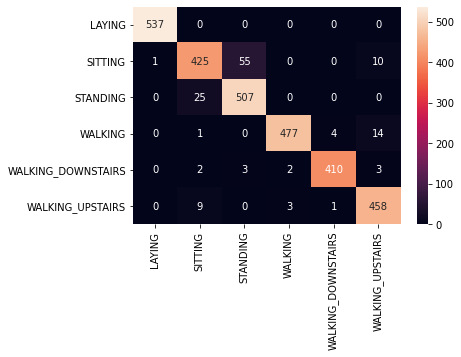

In [37]:
cf_matrix = confusion_matrix(Y_test,Y_pred_label)
df = pd.DataFrame(cf_matrix,columns=encode.classes_)
df.index = encode.classes_
sns.heatmap(df, annot=True,fmt='d');